# Zonal-mean composites

This notebook reproduces Fig. 4 and the wind stress supporting figure for Ford and Rose (submitted 2025). 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr

In [2]:
def deseasonalize(da):
    gb = da.groupby('time.month')
    anom = gb - gb.mean(dim='time')
    return anom

In [3]:
crmask = xr.open_dataset('/roselab_rit/rford/iHESP-data/HRCESM-CRMASK.nc') # Just to get lats

In [4]:
lats = crmask.TLAT.where((crmask.TLAT <= -30) & (crmask.TLONG <= 60), drop=True).mean(dim='nlon')
len(lats)

687

In [5]:
ds_saltwest = xr.open_dataset('/roselab_rit/rford/iHESP-data/HRCESM-60W0ESO-ZMSALT-full.nc').sel(nlat=slice(180, None))
ds_salteast = xr.open_dataset('/roselab_rit/rford/iHESP-data/HRCESM-0E60ESO-ZMSALT-full.nc')

ds_temp = xr.open_dataset('/roselab_rit/rford/iHESP-data/HRCESM-60W60ESO-ZMTEMP-full.nc').sel(nlat=slice(180, None))

In [6]:
z = ds_temp.z_t

In [7]:
ws_clim = ds_saltwest.SALT.mean(dim='time')
es_clim = ds_salteast.SALT.mean(dim='time')

t_clim = ds_temp.TEMP.mean(dim='time')

In [8]:
wsa = deseasonalize(ds_saltwest.SALT)
esa = deseasonalize(ds_salteast.SALT)

ta = deseasonalize(ds_temp.TEMP)

In [9]:
lfca = xr.open_dataset('/roselab_rit/rford/iHESP-data//iHESP-HR.PICTRL.SO-JLFCA.1x1.nc')

In [10]:
lfc1 = lfca.LFC.isel(var=0, mode=0)
lfc2 = lfca.LFC.isel(var=0, mode=1)

In [11]:
pos_lfc1 = lfc1.where(lfc1 > 0., drop=True).time
pos_lfc2 = lfc2.where(lfc2 > 0., drop=True).time
neg_lfc1 = lfc1.where(lfc1 < 0., drop=True).time
neg_lfc2 = lfc2.where(lfc2 < 0., drop=True).time

In [12]:
temp_neg1 = ta.sel(time=neg_lfc1).mean(dim='time').compute()
wsalt_neg1 = wsa.sel(time=neg_lfc1).mean(dim='time').compute()
esalt_neg1 = esa.sel(time=neg_lfc1).mean(dim='time').compute()

temp_pos1 = ta.sel(time=pos_lfc1).mean(dim='time').compute()
wsalt_pos1 = wsa.sel(time=pos_lfc1).mean(dim='time').compute()
esalt_pos1 = esa.sel(time=pos_lfc1).mean(dim='time').compute()

temp_pos2 = ta.sel(time=pos_lfc2).mean(dim='time').compute()
wsalt_pos2 = wsa.sel(time=pos_lfc2).mean(dim='time').compute()
esalt_pos2 = esa.sel(time=pos_lfc2).mean(dim='time').compute()

temp_neg2 = ta.sel(time=neg_lfc2).mean(dim='time').compute()
wsalt_neg2 = wsa.sel(time=neg_lfc2).mean(dim='time').compute()
esalt_neg2 = esa.sel(time=neg_lfc2).mean(dim='time').compute()

# Recast as anomalies from the "normal" non-convecting phase -LFC1

# temp_pos1 = (ta.sel(time=pos_lfc1).mean(dim='time') - temp_neg1).compute()
# wsalt_pos1 = (wsa.sel(time=pos_lfc1).mean(dim='time') - wsalt_neg1).compute()
# esalt_pos1 = (esa.sel(time=pos_lfc1).mean(dim='time') - esalt_neg1).compute()

# temp_pos2 = (ta.sel(time=pos_lfc2).mean(dim='time') - temp_neg1).compute()
# wsalt_pos2 = (wsa.sel(time=pos_lfc2).mean(dim='time') - wsalt_neg1).compute()
# esalt_pos2 = (esa.sel(time=pos_lfc2).mean(dim='time') - esalt_neg1).compute()

# temp_neg1 = (ta.sel(time=neg_lfc1).mean(dim='time') - temp_neg1).compute()
# wsalt_neg1 = (wsa.sel(time=neg_lfc1).mean(dim='time') - wsalt_neg1).compute()
# esalt_neg1 = (esa.sel(time=neg_lfc1).mean(dim='time') - esalt_neg1).compute()

# temp_neg2 = (ta.sel(time=neg_lfc2).mean(dim='time') - temp_neg1).compute()
# wsalt_neg2 = (wsa.sel(time=neg_lfc2).mean(dim='time') - wsalt_neg1).compute()
# esalt_neg2 = (esa.sel(time=neg_lfc2).mean(dim='time') - esalt_neg1).compute()

Text(0, 0.5, '$-$LFC2')

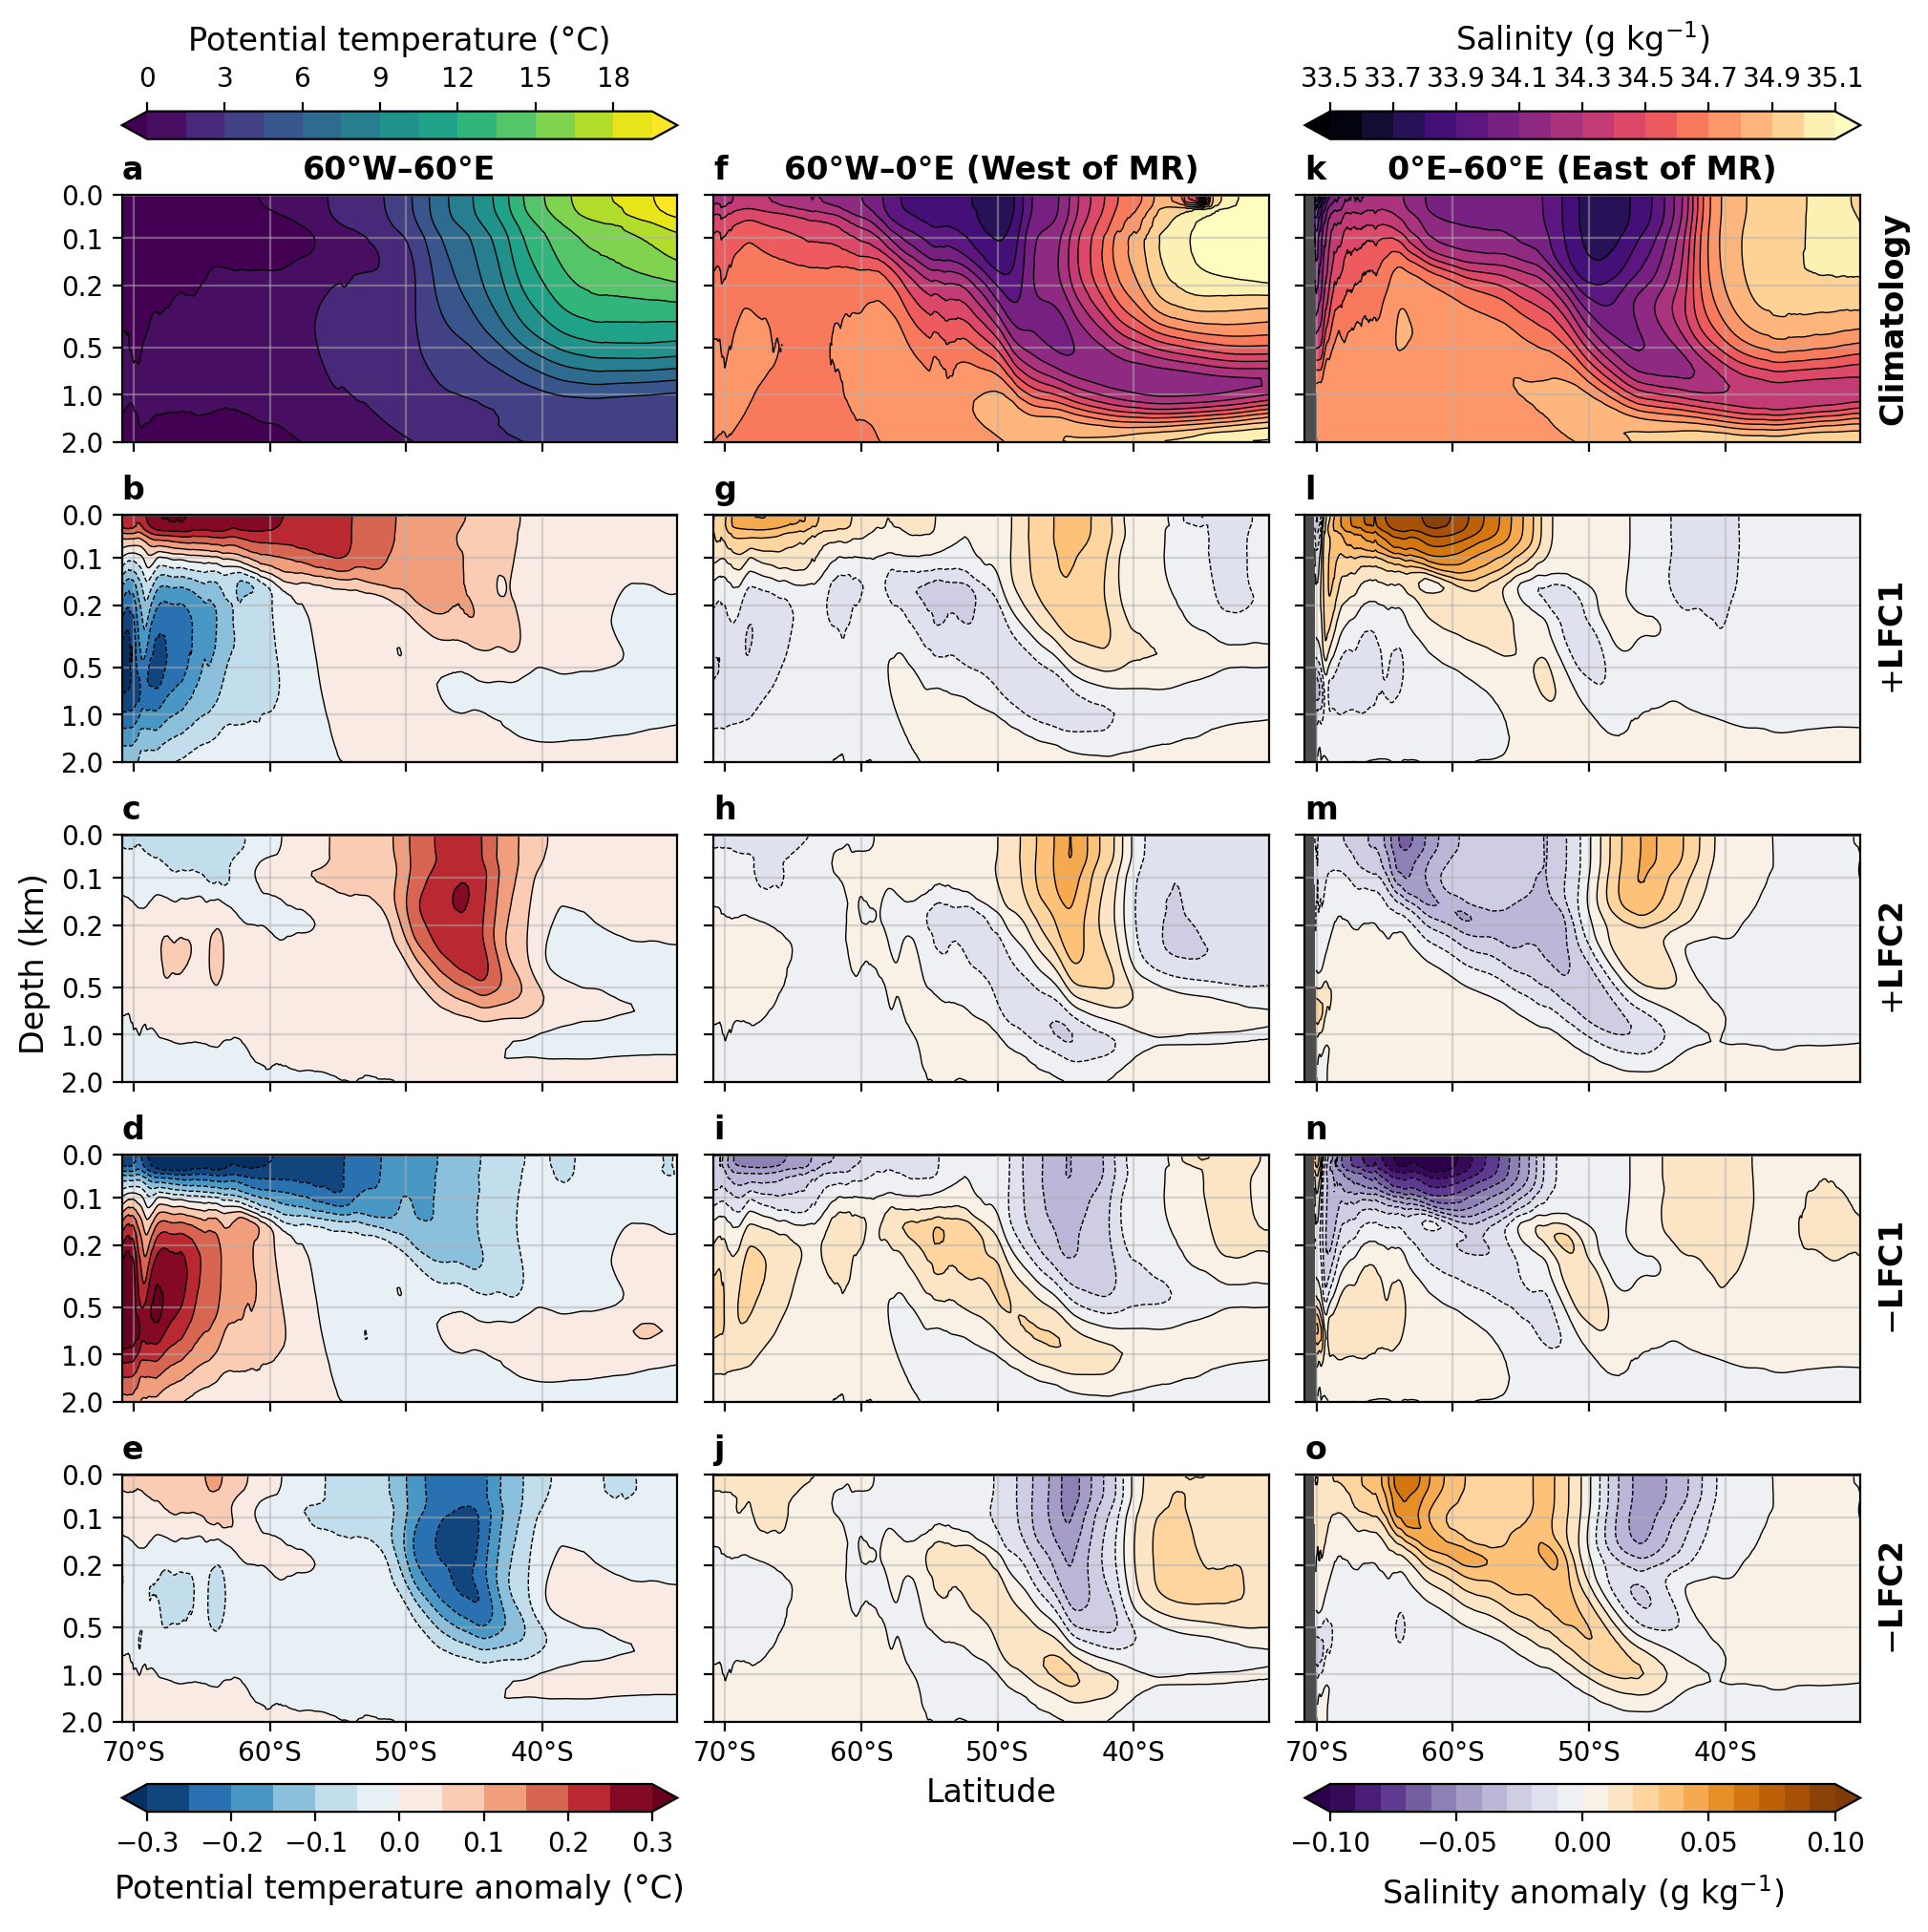

In [13]:
fig4, ax4 = plt.subplots(5, 3, dpi=200, figsize=(10, 10), layout='constrained')

tlvl = np.arange(-0.3, 0.31, 0.05)
slvl = np.arange(-0.1, 0.11, 0.01)
ilvl = np.array([-15., -10., -5., 5., 10., 15.])
dlvl = np.array([-4e-05, -3e-05, -2e-05, -1e-05, 1e-05,  2e-05,  3e-05, 4e-05])
tcmap = plt.cm.RdBu_r
scmap = plt.cm.PuOr_r

t_clim_cf = ax4[0, 0].contourf(lats, z, t_clim, cmap='viridis', levels=15, extend='both')
ax4[0, 0].contourf(lats, z, t_clim, cmap='viridis', levels=15, extend='both')

ax4[0, 0].contour(lats, z, t_clim, colors='k', levels=15, linewidths=0.5)
ws_clim_cf = ax4[0, 1].contourf(lats, z, ws_clim, cmap='magma', levels=np.arange(33.5, 35.1, 0.1), extend='both')
ax4[0, 1].contour(lats, z, ws_clim, colors='k', levels=np.arange(33.5, 35.1, 0.1), linewidths=0.5)
es_clim_cf = ax4[0, 2].contourf(lats, z, es_clim, cmap='magma', levels=np.arange(33.5, 35.1, 0.1), extend='both')
ax4[0, 2].contour(lats, z, es_clim, colors='k', levels=np.arange(33.5, 35.1, 0.1), linewidths=0.5)

t_cf = ax4[1, 0].contourf(lats, z, temp_pos1, cmap=tcmap, levels=tlvl, extend='both')
ax4[1, 0].contour(lats, z, temp_pos1, colors='k', levels=tlvl, linewidths=0.5)
s_cf = ax4[1, 1].contourf(lats, z, wsalt_pos1, cmap=scmap, levels=slvl, extend='both')
ax4[1, 1].contour(lats, z, wsalt_pos1, colors='k', levels=slvl, linewidths=0.5)
ax4[1, 2].contourf(lats, z, esalt_pos1, cmap=scmap, levels=slvl, extend='both')
ax4[1, 2].contour(lats, z, esalt_pos1, colors='k', levels=slvl, linewidths=0.5)

ax4[2, 0].contourf(lats, z, temp_pos2, cmap=tcmap, levels=tlvl, extend='both')
ax4[2, 0].contour(lats, z, temp_pos2, colors='k', levels=tlvl, linewidths=0.5)
ax4[2, 1].contourf(lats, z, wsalt_pos2, cmap=scmap, levels=slvl, extend='both')
ax4[2, 1].contour(lats, z, wsalt_pos2, colors='k', levels=slvl, linewidths=0.5)
ax4[2, 2].contourf(lats, z, esalt_pos2, cmap=scmap, levels=slvl, extend='both')
ax4[2, 2].contour(lats, z, esalt_pos2, colors='k', levels=slvl, linewidths=0.5)

ax4[3, 0].contourf(lats, z, temp_neg1, cmap=tcmap, levels=tlvl, extend='both')
ax4[3, 0].contour(lats, z, temp_neg1, colors='k', levels=tlvl, linewidths=0.5)
ax4[3, 1].contourf(lats, z, wsalt_neg1, cmap=scmap, levels=slvl, extend='both')
ax4[3, 1].contour(lats, z, wsalt_neg1, colors='k', levels=slvl, linewidths=0.5)
ax4[3, 2].contourf(lats, z, esalt_neg1, cmap=scmap, levels=slvl, extend='both')
ax4[3, 2].contour(lats, z, esalt_neg1, colors='k', levels=slvl, linewidths=0.5)

ax4[4, 0].contourf(lats, z, temp_neg2, cmap=tcmap, levels=tlvl, extend='both')
ax4[4, 0].contour(lats, z, temp_neg2, colors='k', levels=tlvl, linewidths=0.5)
ax4[4, 1].contourf(lats, z, wsalt_neg2, cmap=scmap, levels=slvl, extend='both')
ax4[4, 1].contour(lats, z, wsalt_neg2, colors='k', levels=slvl, linewidths=0.5)
ax4[4, 2].contourf(lats, z, esalt_neg2, cmap=scmap, levels=slvl, extend='both')
ax4[4, 2].contour(lats, z, esalt_neg2, colors='k', levels=slvl, linewidths=0.5)

sp_labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o']
for i, ax in enumerate(ax4.flatten('F')):
    # ax.set_xlim(-77, -31)
    ax.grid(alpha=0.5)
    ax.set_yscale('symlog', linthresh=100e2, linscale=0.25)
    ax.set_ylim(1, 2000e2)
    ax.set_facecolor('0.3')
    ax.invert_yaxis()
    ax.set_title(sp_labels[i], fontweight='bold', color='k', loc='left')
    # ax.annotate(sp_labels[i], xy=(0.94, 0.05), xycoords='axes fraction', fontweight='bold', color='k')

for ax in ax4[:, 0]:
    ax.set_yticks([0, 100e2, 200e2, 500e2, 1000e2, 2000e2], ['0.0', '0.1', '0.2', '0.5', '1.0', '2.0'])

for ax in ax4[:, 1:].flatten():
    ax.set_yticks([0, 100e2, 200e2, 500e2, 1000e2, 2000e2], [])

for ax in ax4[0:4, :].flatten():
    ax.set_xticklabels([])

for ax in ax4[4, :]:
    ax.set_xticks([-70, -60, -50, -40], ['70°S', '60°S', '50°S', '40°S'])
    ax.set_xticks([-70, -60, -50, -40], ['70°S', '60°S', '50°S', '40°S'])
    ax.set_xticks([-70, -60, -50, -40], ['70°S', '60°S', '50°S', '40°S'])

t_clim_cb = plt.colorbar(t_clim_cf, ax=ax4[0, 0], location='top', pad=0.06)
t_clim_cb.set_label(label='Potential temperature (°C)', labelpad=6, size=12)
s_clim_cb = plt.colorbar(es_clim_cf, ax=ax4[0, 2], location='top', pad=0.06)
s_clim_cb.set_label(label='Salinity (g kg$^{-1}$)', labelpad=6, size=12)

t_cb = plt.colorbar(t_cf, ax=ax4[4, 0], location='bottom', pad=-0.1)
t_cb.set_label(label='Potential temperature anomaly (°C)', labelpad=6, size=12)
s_cb = plt.colorbar(s_cf, ax=ax4[4, 2], location='bottom', pad=-0.1, ticks=[-0.1, -0.05, 0.00, 0.05, 0.1])
s_cb.set_label(label='Salinity anomaly (g kg$^{-1}$)', labelpad=6, size=12)

ax4[0, 0].set_title('60°W–60°E', fontweight='bold')
ax4[0, 1].set_title('60°W–0°E (West of MR)', fontweight='bold')
ax4[0, 2].set_title('0°E–60°E (East of MR)', fontweight='bold')

ax4[2, 0].set_ylabel('Depth (km)', y=0.48, size=12)
ax4[4, 1].set_xlabel('Latitude', size=12)
ax4[0, 2].set_ylabel('Climatology', labelpad=-235.0, fontweight='bold', size=12)
ax4[1, 2].set_ylabel('$+$LFC1', labelpad=-235.0, fontweight='bold', size=12)
ax4[2, 2].set_ylabel('$+$LFC2', labelpad=-235.0, fontweight='bold', size=12)
ax4[3, 2].set_ylabel('$-$LFC1', labelpad=-235.0, fontweight='bold', size=12)
ax4[4, 2].set_ylabel('$-$LFC2', labelpad=-235.0, fontweight='bold', size=12)

In [14]:
# fig4.savefig('zm-log.png')

In [15]:
ds_taux = xr.open_dataset('/roselab_rit/rford/iHESP-data/HRCESM-60W60ESO-TAUX-full.nc').sel(nlat=slice(180, None))

In [16]:
zm_taux = ds_taux.TAUX.mean(dim='nlon').compute()

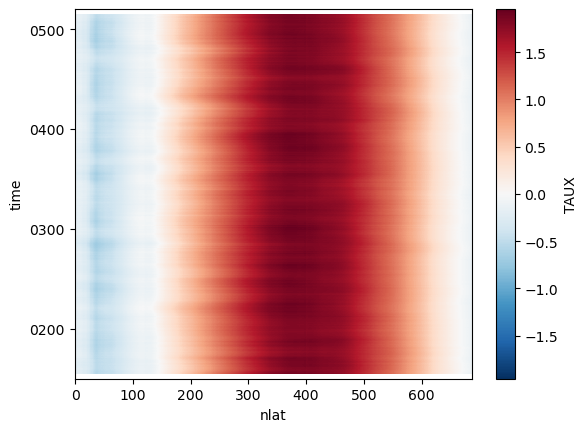

In [17]:
zm_taux.rolling(time=120, center=True).mean().plot()

In [18]:
zm_taux_clim = zm_taux.mean(dim='time')

In [19]:
taux_pos1 = zm_taux.sel(time=pos_lfc1).mean(dim='time').compute()
taux_pos2 = zm_taux.sel(time=pos_lfc2).mean(dim='time').compute()
taux_neg1 = zm_taux.sel(time=neg_lfc1).mean(dim='time').compute()
taux_neg2 = zm_taux.sel(time=neg_lfc2).mean(dim='time').compute()

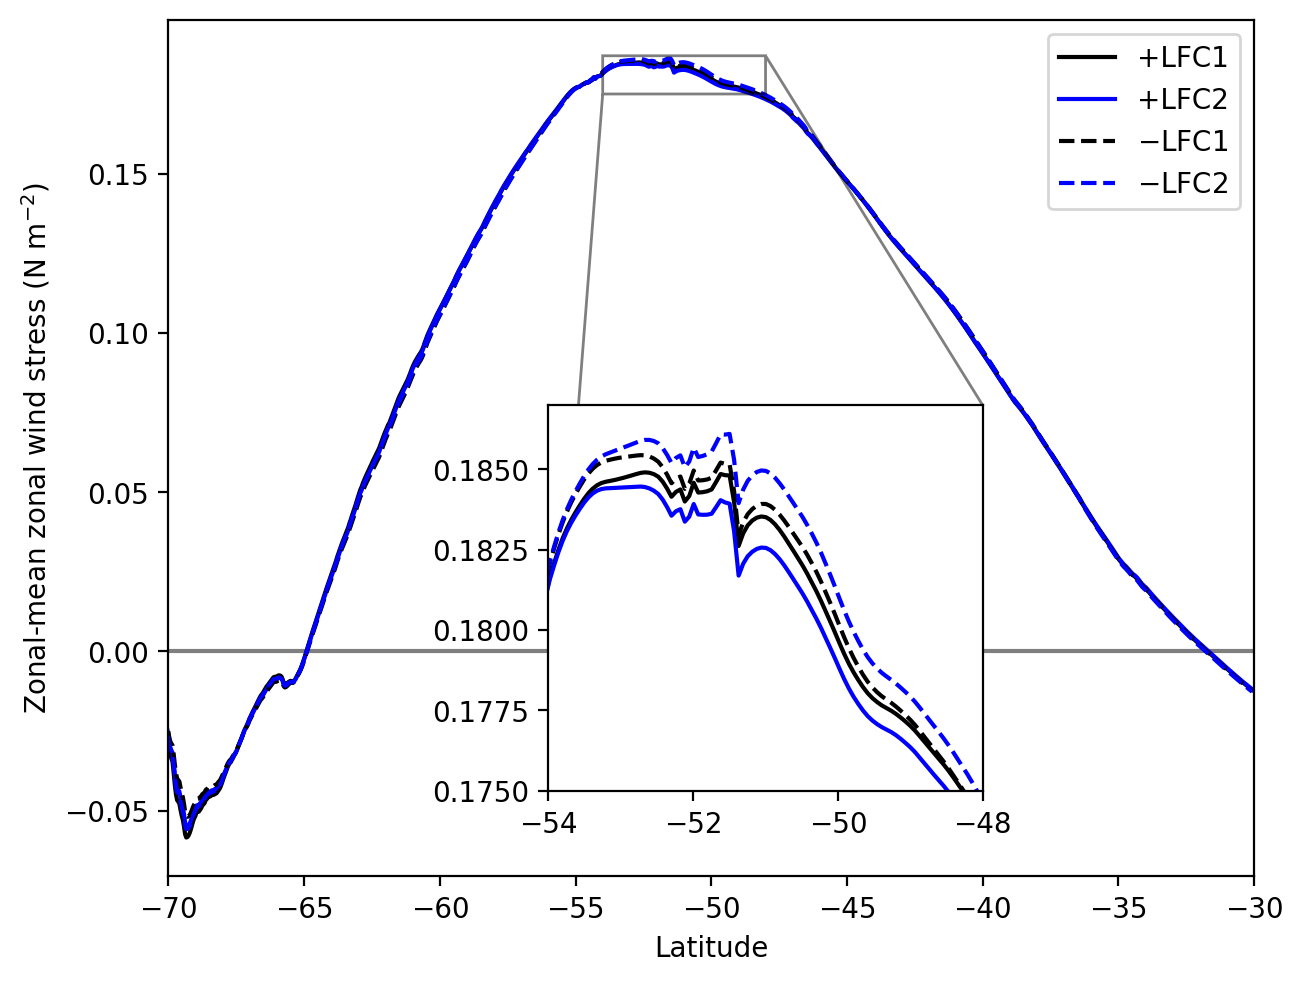

In [20]:
figt, ax = plt.subplots(dpi=200, layout='constrained')
ax.axhline(0, color='k', alpha=0.5)
ax.plot(lats, 0.1*taux_pos1, color='k', label='+LFC1')
ax.plot(lats, 0.1*taux_pos2, color='b', label='+LFC2')
ax.plot(lats, 0.1*taux_neg1, color='k', linestyle='--', label='$-$LFC1')
ax.plot(lats, 0.1*taux_neg2, color='b', linestyle='--', label='$-$LFC2')
ax.set_ylabel('Zonal-mean zonal wind stress (N m$^{-2}$)')
ax.set_xlabel('Latitude')
ax.set_xlim(-70, -30)
plt.legend()

axins = ax.inset_axes(
    [0.35, 0.1, 0.4, 0.45],
    xlim=(-54, -48), ylim=(0.175, 0.187))

axins.plot(lats, 0.1*taux_pos1, color='k')
axins.plot(lats, 0.1*taux_pos2, color='b')
axins.plot(lats, 0.1*taux_neg1, color='k', linestyle='--')
axins.plot(lats, 0.1*taux_neg2, color='b', linestyle='--')

ax.indicate_inset_zoom(axins, edgecolor="black")

In [21]:
# figt.savefig('si-tau.png')